# Лабораторная работа 5
# Решающие деревья и случайные леса

## Лабораторная 5.1. Применение модели решающих деревьев в задачах классификации

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### 1. 
Целевой датасет - ```diabets```.  Решим задачу классификации больных методом ```логистической регрессии``` и ```решающих деревьев``` используя стандартные настройки моделей. Выведем стандартные метрики. Сделаем вывод на основе анализа метрик о том, какая из рассмотренных моделей более подходит для исследуемого датасета.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv", sep=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = data.drop('Outcome', axis=1)
y = data.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [12]:
logistic_model = LogisticRegression().fit(X_train, y_train)
tree_model = DecisionTreeClassifier().fit(X_train, y_train)

y_logistic_pred = logistic_model.predict(X_test)
y_tree_pred = tree_model.predict(X_test)

C:\Users\PAVILION\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


При использовании логистической регрессии часто приходится приводить данные к стандартному виду с ```mean = 0``` и ```std = 1```

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logistic_pipe_model = make_pipeline(StandardScaler(), LogisticRegression()).fit(X_train, y_train)
tree_model = DecisionTreeClassifier().fit(X_train, y_train)

y_logistic_pred = logistic_pipe_model.predict(X_test)
y_tree_pred = tree_model.predict(X_test)

Проверим модели на метриках ```[precision_score, recall_score, f1_score]```

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Логистическая регрессия | Решающее дерево')
print(f'{precision_score(y_test, y_logistic_pred)} | {precision_score(y_test, y_tree_pred)}')
print(f'{recall_score(y_test, y_logistic_pred)} | {recall_score(y_test, y_tree_pred)}')
print(f'{f1_score(y_test, y_logistic_pred)} | {f1_score(y_test, y_tree_pred)}')

Логистическая регрессия | Решающее дерево
0.7457627118644068 | 0.5316455696202531
0.5238095238095238 | 0.5
0.6153846153846154 | 0.5153374233128835


У обоих моделей не очень хорошие показатели точности, но ```Логистическая регрессия``` показала себя заметно лучше

### 2.	
Исследуем значение какой-либо выбранной метрики и исследуем зависимости от глубины решающего дерева, а также построим график зависимости.

В качестве метрики возьмем ```f1_score```, так как она является средним ```recall``` и ```precision```.

In [41]:
f1_scores = list()
depthes = [3, 7, 12, 20, 30, 40, 50, 70, 90, 110]
for max_depth in depthes:
    model = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
    predicted = model.predict(X_test)
    f1_scores.append(f1_score(y_test, predicted))

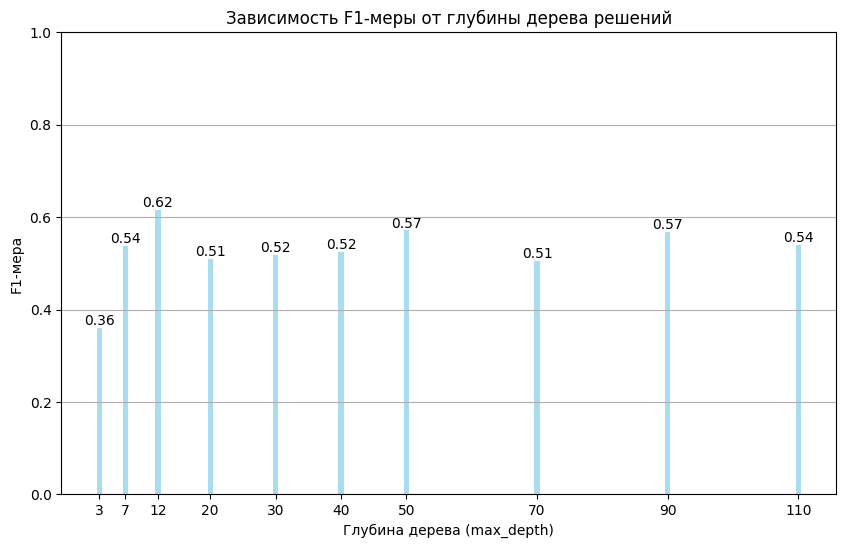

In [45]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
bars = plt.bar(depthes, f1_scores, color='skyblue', alpha=0.7)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Настройка графика
plt.title('Зависимость F1-меры от глубины дерева решений')
plt.xlabel('Глубина дерева (max_depth)')
plt.ylabel('F1-мера')
plt.xticks(depthes)  # Установка меток по оси X
plt.ylim(0, 1)  # Установка пределов по оси Y (если F1-мера от 0 до 1)
plt.grid(axis='y')

Видим, что при глубине дерева равной ```12```, ```f1_score = 0.62```, что превышает показатель ранее исследуемой ```Логистической регрессии```

### 3.	
Для  модели с оптимальной глубиной, отрисуем получившееся дерево, важность признаков (feature importances) в виде столбчатой диаграммы, а также PR и ROC кривые

In [68]:
model_depth_12 = DecisionTreeClassifier(max_depth=12).fit(X_train, y_train)
y_12_pred = model_depth_12.predict(X_test)

In [69]:
import graphviz 
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model_depth_12)  
dot_data = export_graphviz(model_depth_12, out_file=None, 
                     feature_names=X.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("diabetes")

'diabetes.pdf'

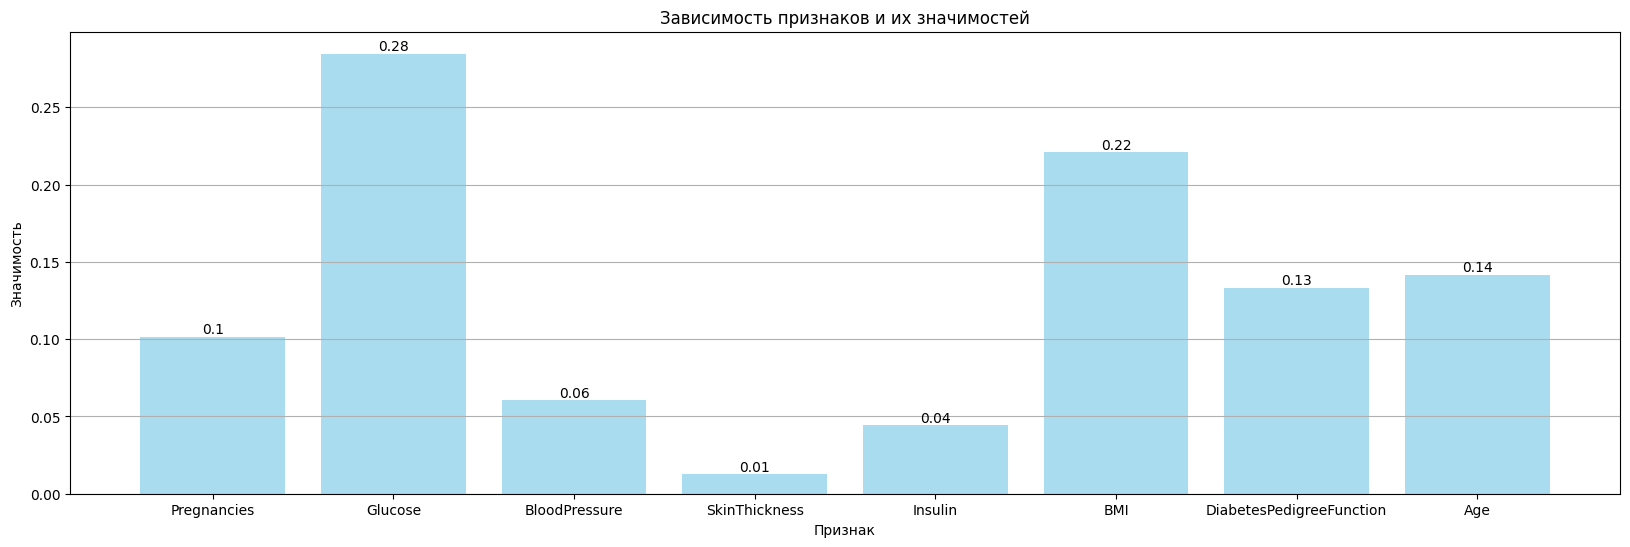

In [70]:
# Построение гистограммы
plt.figure(figsize=(20, 6))
bars = plt.bar(model_depth_12.feature_names_in_, model_depth_12.feature_importances_, color='skyblue', alpha=0.7)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Настройка графика
plt.title('Зависимость признаков и их значимостей')
plt.xlabel('Признак')
plt.ylabel('Значимость')
plt.xticks(model_depth_12.feature_names_in_)  # Установка меток по оси X
plt.grid(axis='y')

Как видим, наиболее значимый признак для вывления диабета - ```Glucose```

In [71]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc

Text(0, 0.5, 'Precision')

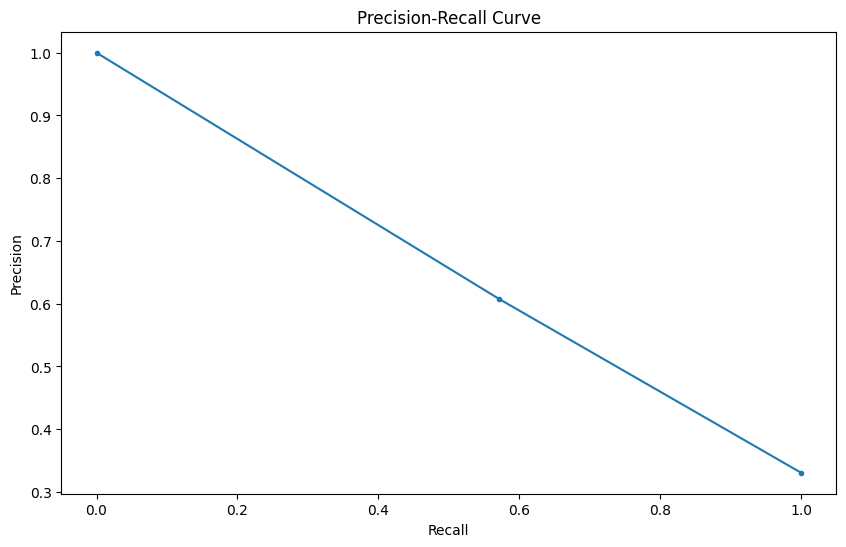

In [72]:
precision, recall, _ = precision_recall_curve(y_test, y_12_pred)
average_precision = average_precision_score(y_test, y_12_pred)

# Построение графика Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

По показателю ```Precision-Recall``` модель не обадает хорошей точностью. Посмотрим на график ```Roc-Auc```

ROC-AUC =  0.6945378151260504


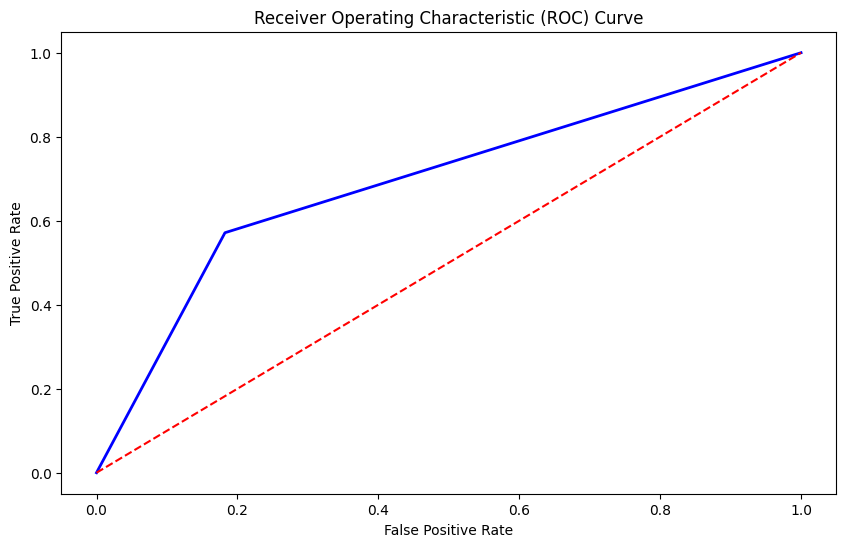

In [74]:
# Вычисление FPR и TPR
fpr, tpr, thresholds = roc_curve(y_test, y_12_pred)

# Вычисление площади под ROC-кривой
roc_auc = auc(fpr, tpr)

# Построение графика ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('ROC-AUC = ', roc_auc)

И по данному графику хорошо видно неудовлетворительную точность нашей модели

### 4.
Попробуем улучшить нашу модель путем подбора различных гиперпараметров.

Для подбора лучших гиперпараметров будем использовать специальную функцию ```RandomizedSearchCV```

In [107]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth': (7, 10, 13, 15, 19, 25, 40, 60, 80, 100),
    'min_samples_split': range(2, 30, 2),
    'min_samples_leaf': range(1, 30, 2),
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=params, cv=5)

In [108]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': (7, 10, 13, 15, 19, 25, 40,
                                                      60, 80, 100),
                                        'min_samples_leaf': range(1, 30, 2),
                                        'min_samples_split': range(2, 30, 2)})

In [109]:
random_search.best_params_

{'min_samples_split': 20, 'min_samples_leaf': 9, 'max_depth': 25}

In [110]:
best_tree_model = random_search.best_estimator_
y_best_model_pred = best_tree_model.predict(X_test)

ROC-AUC =  0.6972689075630252


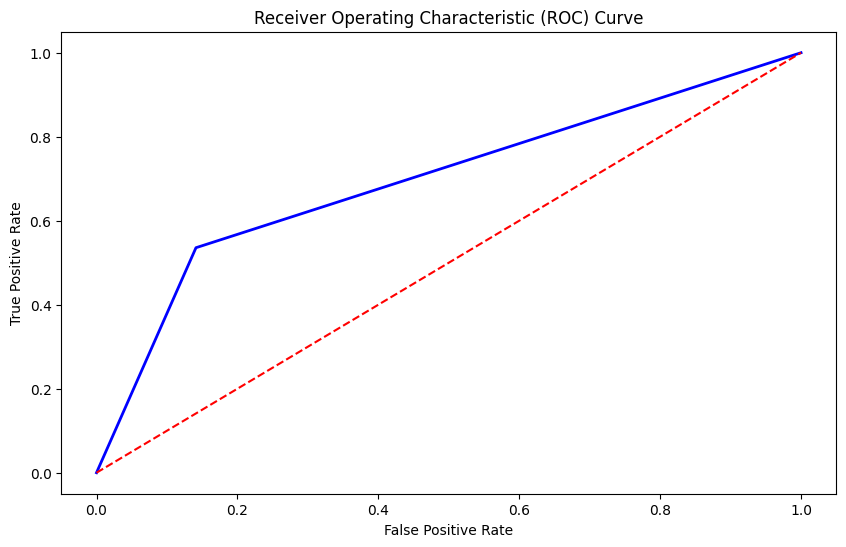

In [111]:
# Вычисление FPR и TPR
fpr, tpr, thresholds = roc_curve(y_test, y_best_model_pred)

# Вычисление площади под ROC-кривой
roc_auc = auc(fpr, tpr)

# Построение графика ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('ROC-AUC = ', roc_auc)

Мы не получили более качественную модель, попробуем воспользоваться ```GridSearchCV```

In [114]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': (7, 10, 13, 15, 19, 25, 40, 60, 80, 100),
    'min_samples_split': range(2, 30, 2),
    'min_samples_leaf': range(1, 30, 2),
}

grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5)

In [115]:
grid_search.fit(X_train, y_train)

C:\Users\PAVILION\miniconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': (7, 10, 13, 15, 19, 25, 40, 60, 80, 100),
                         'min_samples_leaf': range(1, 30, 2),
                         'min_samples_split': range(2, 30, 2)})

In [117]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 10}

In [119]:
best_tree_model = grid_search.best_estimator_
y_best_model_pred = best_tree_model.predict(X_test)

ROC-AUC =  0.7062324929971988


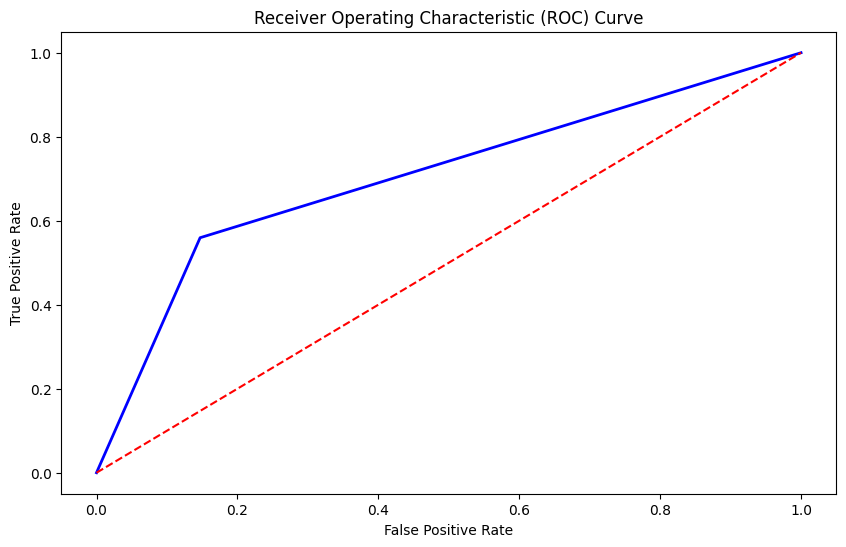

In [120]:
# Вычисление FPR и TPR
fpr, tpr, thresholds = roc_curve(y_test, y_best_model_pred)

# Вычисление площади под ROC-кривой
roc_auc = auc(fpr, tpr)

# Построение графика ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('ROC-AUC = ', roc_auc)

При переборе множества гиперпараметров мы получили ```ROC-AUC =  0.70```, что почти не отличается от результата, где мы перебирали только глубину (```0.69```). Возможно мы подошли к максимуму, которому можно достичь Решающим Деревом в данном датасете, используя только средства и параметра данной модели